# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [8]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH']/365
app_train['YEARS_BIRTH_GRP'] = pd.cut(app_train['YEARS_BIRTH'], right = True, bins = np.linspace(20,70, num=11))
app_train['YEARS_BIRTH_GRP'].value_counts()

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEARS_BIRTH_GRP, dtype: int64

In [9]:
age_groups  = app_train.groupby('YEARS_BIRTH_GRP').mean()
age_groups

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,YEARS_BIRTH
YEARS_BIRTH_GRP,,,,,,,,,,,,,,,,,,,,,
"(20.0, 25.0]",277358.960688,0.123036,0.262604,0.318283,0.631795,0.214327,145349.196965,414914.548853,21679.641635,374891.145507,...,0.000329,0.005264,0.008974,0.006816,0.033738,0.157674,0.270249,1.545723,False,23.377522
"(25.0, 30.0]",277837.106628,0.111436,0.107084,0.382265,0.602215,0.527113,164764.078910,506670.477634,25847.846211,456469.012189,...,0.000974,0.000791,0.007455,0.007822,0.033713,0.223540,0.258134,1.793353,False,27.822518
"(30.0, 35.0]",277962.566709,0.102814,0.098301,0.409432,0.629919,0.815923,178096.685310,571973.248251,27401.403241,513821.389447,...,0.000634,0.000051,0.006208,0.007782,0.034801,0.288408,0.252849,1.783060,False,32.479037
"(35.0, 40.0]",278149.565527,0.089414,0.095269,0.405734,0.660726,0.846552,179617.542456,627017.073050,28277.648436,564062.701464,...,0.000537,0.000140,0.006155,0.007000,0.033892,0.279646,0.264087,1.828213,False,37.555913
"(40.0, 45.0]",278885.543375,0.078491,0.095349,0.392093,0.684635,0.584625,181633.860249,648860.277931,28762.835656,583035.478547,...,0.000797,0.000072,0.006013,0.006176,0.034210,0.295187,0.260435,1.880468,False,42.459346
"(45.0, 50.0]",277999.882226,0.074171,0.089796,0.357535,0.749338,0.285470,179306.475713,668338.014288,28945.330672,597794.150822,...,0.000427,0.000000,0.006908,0.006581,0.033166,0.305536,0.253577,1.880595,False,47.462741
"(50.0, 55.0]",278391.825883,0.066968,0.081707,0.310486,0.736993,0.108380,171307.989238,654423.080319,28193.672233,587926.229018,...,0.000343,0.000029,0.006053,0.007270,0.037106,0.294714,0.263199,1.944439,False,52.593136
"(55.0, 60.0]",278547.738647,0.055314,0.078865,0.253623,0.751600,0.039946,158608.647408,638909.920109,26887.978275,575106.476031,...,0.000302,0.000030,0.005948,0.006876,0.033179,0.271343,0.281176,2.036411,False,57.491131
"(60.0, 65.0]",277842.816858,0.052737,0.073701,0.197008,0.771073,0.015432,144782.885738,598861.564584,25435.055558,538595.717972,...,0.000073,0.000000,0.006736,0.007155,0.035858,0.214226,0.283849,2.162385,False,62.412459


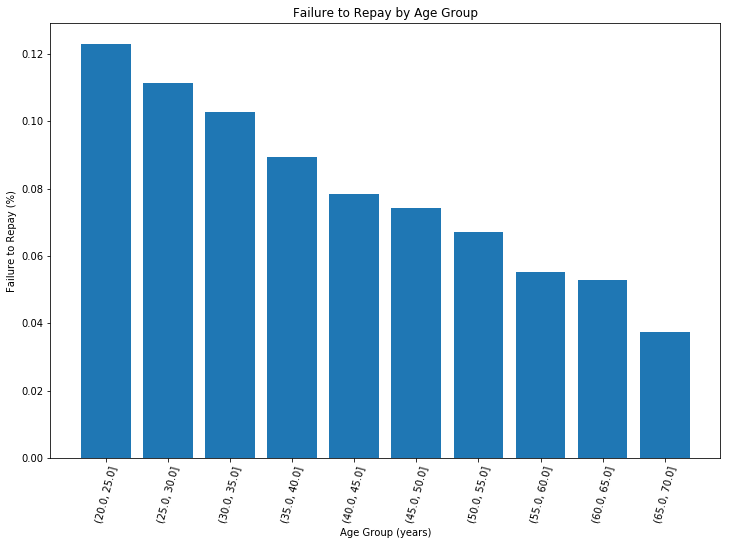

In [46]:
#同樣的圖用seaborn就不需要把x,y值挑出來畫。見Day_016
plt.figure(figsize=(12,8))
px = app_train['YEARS_BIRTH_GRP'].unique().sort_values(ascending=True).astype(str)
py = age_groups['TARGET'].values
plt.bar(px,py)
# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');